# Morphological Operators

Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc. also comes into play. 

[Morphological Transformations](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)

## Importing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Creating Functions to Load and Display Images

In [2]:
def load_image():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text="ABCDE", org=(50, 300),  fontFace=font, fontScale= 5, color=(255, 255, 255), thickness=25, lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1, cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2, cmap="gray")
    plt.title(title_2)

## Loading the Image

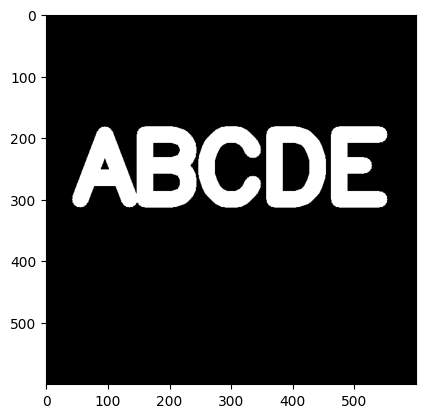

In [4]:
image = load_image()
plt.imshow(image, cmap="gray")

## Structuring Element

We manually created a structuring elements in the previous examples with help of Numpy. It is rectangular shape. But in some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, `cv2.getStructuringElement`. You just pass the shape and size of the kernel, you get the desired kernel.

---

`cv2.getStructuringElement(int shape, Tuple[int, int] size, Tuple[int, int] anchor=(-1, -1))`

**Description:** Returns a structuring element of the specified size and shape for morphological operations.

**Parameters:**

`shape`: Element shape that could be one of MorphShapes.
* `MORPH_RECT`: A rectangular structuring element.
* `MORPH_CROSS`: A cross-shaped structuring element.
* `MORPH_ELLIPSE`: An elliptic structuring element.

`size`: Size of the structuring element.

`anchor`: Anchor position within the element. The default value (−1,−1) means that the anchor is at the center. 

**Return Value:** It returns a kernel.

---

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

## Performing Operations

The function `cv2.morphologyEx` can perform advanced morphological transformations using an erosion and dilation as basic operations.

---

`cv2.morphologyEx(Mat src, int op, Mat kernel, Mat dst=None, anchor=(-1, -1), int iterations=1, int borderType=BORDER_CONSTANT)`

**Description:** Performs advanced morphological transformations.

**Parameters:**

`src`: Source image. The number of channels can be arbitrary.

`op`: Type of a morphological operation.
* `MORPH_ERODE`: Erode away the boundaries of foreground object.
* `MORPH_DILATE`: Opposite of erosion.
* `MORPH_OPEN`: Erosion followed by dilation.
* `MORPH_CLOSE`: Dilation followed by rosion
* `MORPH_GRADIENT`: Difference between dilation and erosion.
* `MORPH_TOPHAT`: Difference between input image and opening of the image.
* `MORPH_BLACKHAT`: Difference between the closing of the image and input image.

`kernel`: Structuring element. It can be created using `cv2.getStructuringElement`.

`dst`: Destination image of the same size and type as source image.

`anchor`: Anchor position within the element. The default value (−1,−1) means that the anchor is at the center. 

`iteration`: Number of times erosion and dilation are applied.

`borderType`: It depicts what kind of border to be added.

* `BORDER_CONSTANT`: `iiiiii|abcdefgh|iiiiiii` with some specified `i`
* `BORDER_REPLICATE`: `aaaaaa|abcdefgh|hhhhhhh`
* `BORDER_REFLECT`: `fedcba|abcdefgh|hgfedcb`
* `BORDER_WRAP`: `cdefgh|abcdefgh|abcdefg`
* and a few more...

**Return Value:** It returns the transformed image.

---

### Erosion

The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).


So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc.

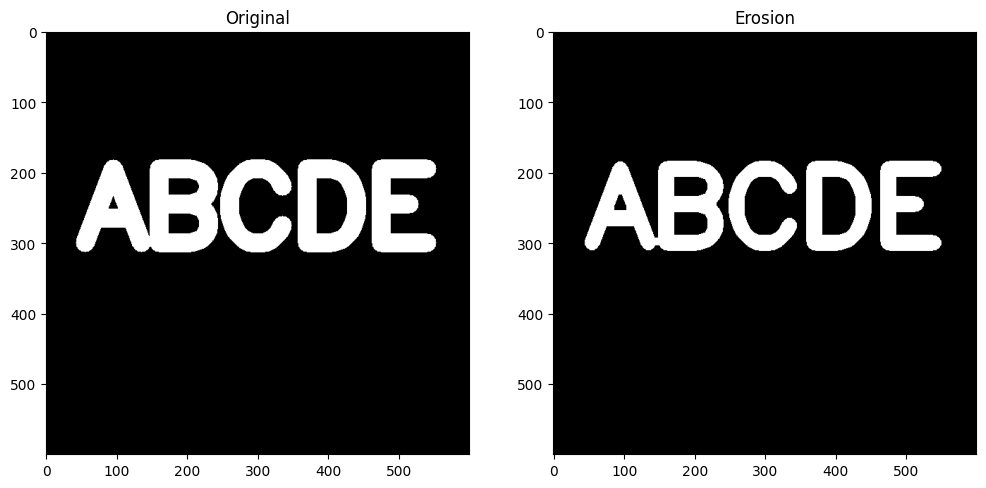

In [6]:
erosion = cv2.morphologyEx(image, cv2.MORPH_ERODE, kernel)
display_image(image, erosion, title_1="Original", title_2="Erosion")

### Dilation

It is just opposite of erosion. Here, a pixel element is '1' if at least one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases. It is also useful in joining broken parts of an object.

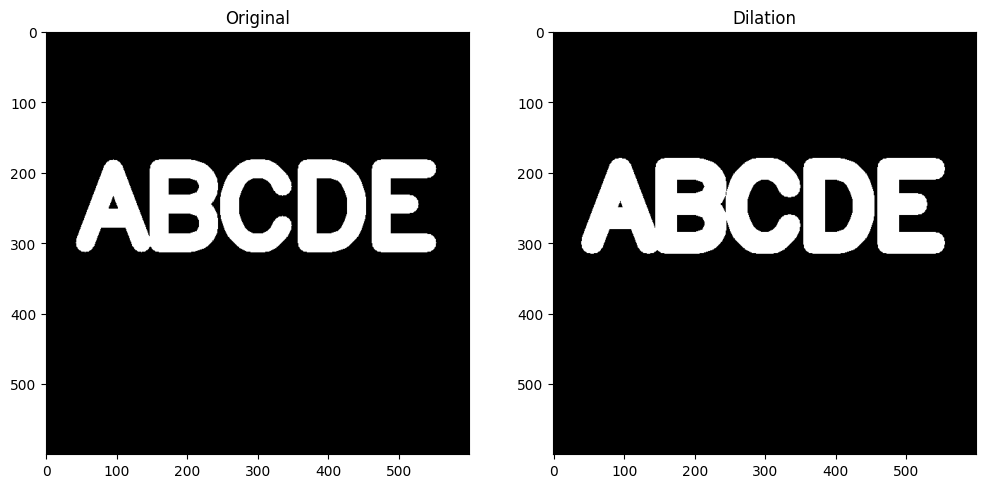

In [7]:
dilation = cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel)
display_image(image, dilation, title_1="Original", title_2="Dilation")

### Opening
Opening is erosion followed by dilation. Useful in removing background noise.

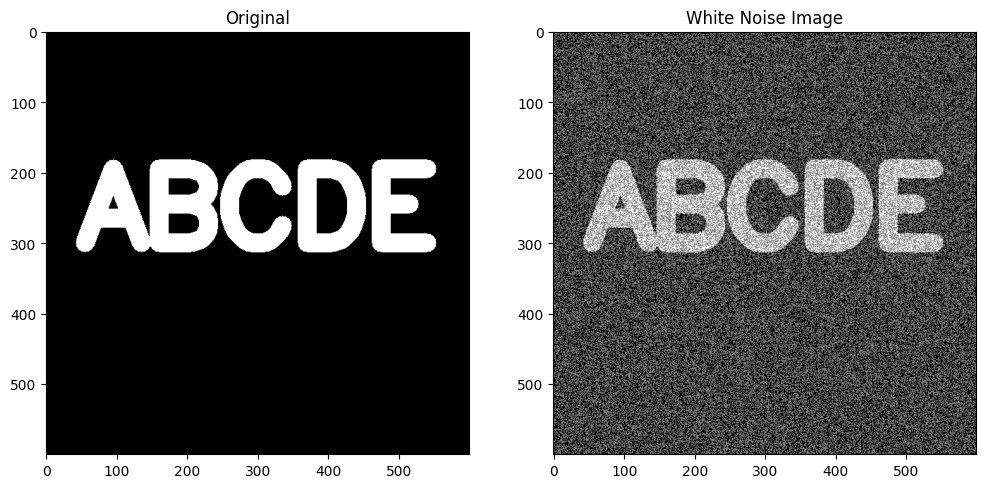

In [8]:
white_noise = np.random.randint(low=0, high=2, size=(600, 600)) * 255
white_noise_image = white_noise + image
display_image(image, white_noise_image, title_1="Original", title_2="White Noise Image")

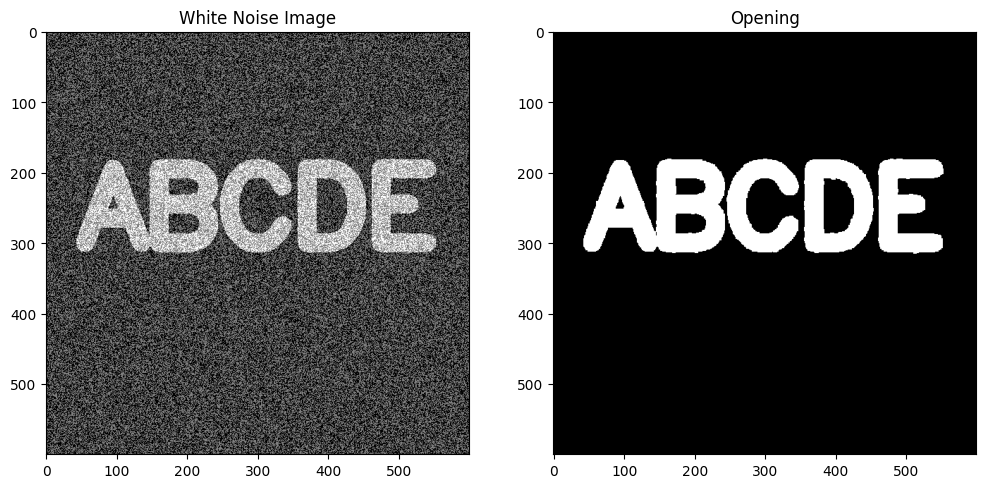

In [9]:
opening = cv2.morphologyEx(white_noise_image, cv2.MORPH_OPEN, kernel)
display_image(white_noise_image, opening, title_1="White Noise Image", title_2="Opening")

### Closing
Closing is reverse of opening, dilation followed by erosion. Useful in removing noise from foreground objects, such as black dots on top of the white text.

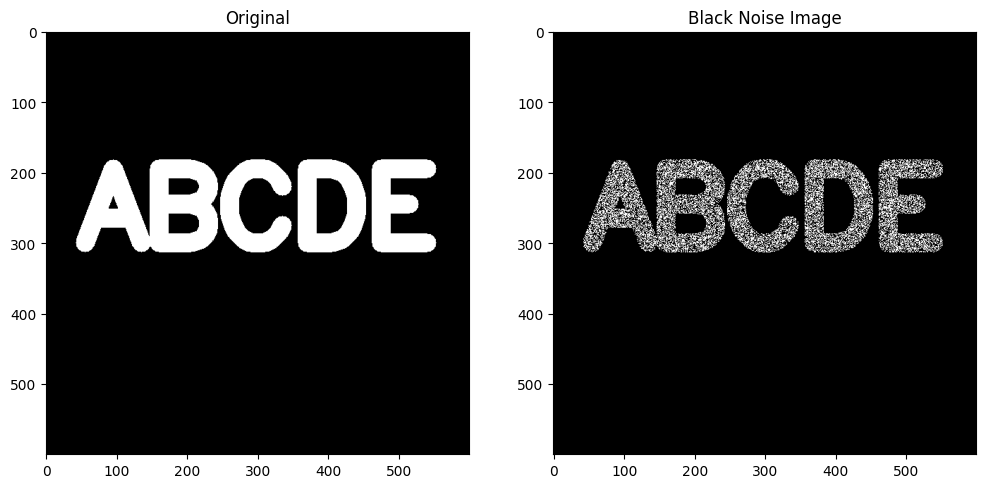

In [10]:
black_noise = np.random.randint(low=0, high=2, size=(600, 600)) * -255
black_noise_image = black_noise + image
black_noise_image[black_noise_image==-255] = 0
display_image(image, black_noise_image, title_1="Original", title_2="Black Noise Image")

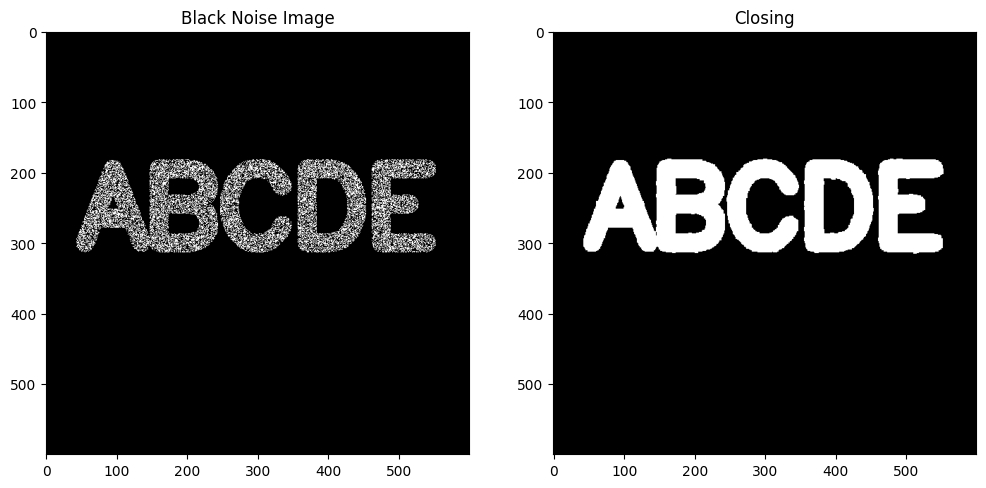

In [11]:
closing = cv2.morphologyEx(black_noise_image, cv2.MORPH_CLOSE, kernel)
display_image(black_noise_image, opening, title_1="Black Noise Image", title_2="Closing")

### Morphological Gradient

Difference between dilation and erosion of an image.

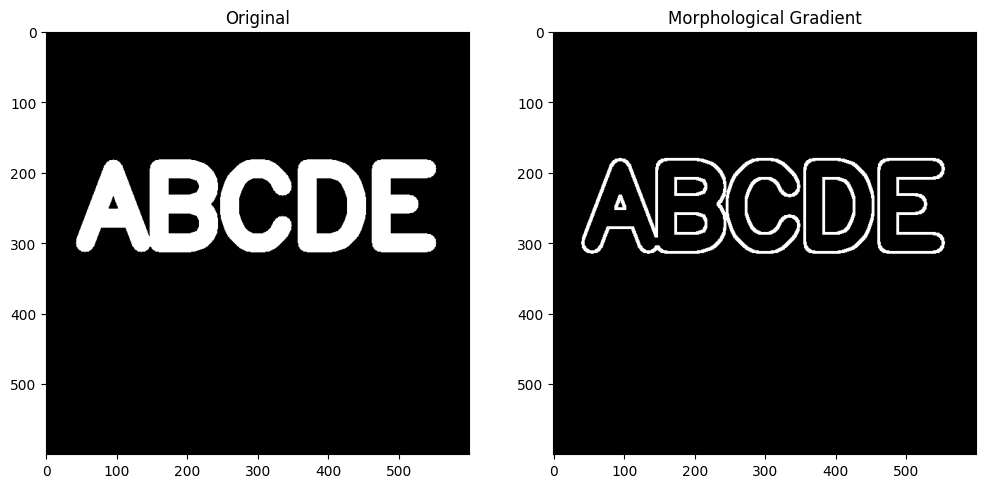

In [12]:
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
display_image(image, gradient, title_1="Original", title_2="Morphological Gradient")